<font size='10'>Opinions of Medical Facilities: A Regional Comparison</font><br>
<font size='6'>Companion Notebook</font>

<font size='4'>WGU MSDA Program D214 - Charles G. Rowe 006539689</font>

In [35]:
import os
import pandas as pd

directory = os.chdir("G:\My Drive\Capstone Files\Datasets")

<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\charlesrowe\AppData\Local\Temp\ipykernel_25896\1295670377.py:4: SyntaxWarning: invalid escape sequence '\M'
  directory = os.chdir("G:\My Drive\Capstone Files\Datasets")


In [36]:
df = pd.read_csv("full.csv")
df.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'spill1', 'spill2', 'spill3', 'spill4',
       'spill5', 'spill7', 'spill7.1', 'spill8', 'state'],
      dtype='object')

In [37]:
df = df.drop(columns=["spill1","spill2","spill3","spill4","spill5","spill7","spill7.1","spill8"])
df.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'state'],
      dtype='object')

In [38]:
num_missing_vals = df.isna().sum()
num_missing_vals

num_missing_reviews = df['Review Text'].isna().sum()
num_missing_reviews

df = df.dropna(subset=['Review Text'])
df.columns

num_missing_reviews = df['Review Text'].isna().sum()
num_missing_reviews

num_missing_replies = df['Owner Answer'].isna().sum()
num_missing_replies

df['Owner Answer'] = df["Owner Answer"].fillna('no answer')
num_missing_replies = df['Owner Answer'].isna().sum()
num_missing_replies

df['Owner Answer Date'] = df["Owner Answer Date"].fillna('no date')
num_missing_replies = df['Owner Answer Date'].isna().sum()
num_missing_replies

df['Author'] = df["Author"].fillna('anonymous')
num_missing_replies = df['Author'].isna().sum()
num_missing_replies

num_missing_vals = df.isna().sum()
num_missing_vals

df.to_csv("cleaned_full_df.csv")
df = pd.read_csv("cleaned_full_df.csv")

df.dtypes

Unnamed: 0.1           int64
Unnamed: 0             int64
Author                object
Review Text           object
Review Rating          int64
Date                  object
Owner Answer          object
Owner Answer Date     object
Author Profile        object
Author Image          object
Review URL            object
label                 object
zip                  float64
state                 object
dtype: object

In [39]:
df2 = pd.read_csv("new_data.csv")

df2 = df2.drop(columns=["spill1","spill2","spill3","spill4","spill5","spill6","spill7"])
df2.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'state'],
      dtype='object')

In [40]:
num_missing_vals = df2.isna().sum()
num_missing_vals

num_missing_reviews = df2['Review Text'].isna().sum()
num_missing_reviews

df2 = df2.dropna(subset=['Review Text'])
df.columns

num_missing_reviews = df2['Review Text'].isna().sum()
num_missing_reviews

num_missing_replies = df2['Owner Answer'].isna().sum()
num_missing_replies

df2['Owner Answer'] = df2["Owner Answer"].fillna('no answer')
num_missing_replies = df2['Owner Answer'].isna().sum()
num_missing_replies

df2['Owner Answer Date'] = df2["Owner Answer Date"].fillna('no date')
num_missing_replies = df2['Owner Answer Date'].isna().sum()
num_missing_replies

df2['Author'] = df2["Author"].fillna('anonymous')
num_missing_replies = df2['Author'].isna().sum()
num_missing_replies

num_missing_vals = df2.isna().sum()
num_missing_vals

df2.to_csv("cleaned_full_df2.csv")

df = pd.read_csv("cleaned_full_df.csv")
df2 = pd.read_csv("cleaned_full_df2.csv")

df.dtypes
df2.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Author               object
Review Text          object
Review Rating         int64
Date                 object
Owner Answer         object
Owner Answer Date    object
Author Profile       object
Author Image         object
Review URL           object
label                object
zip                   int64
state                object
dtype: object

In [41]:
import numpy as np
df['has owner answer'] = np.where(df["Owner Answer"] != "no answer", '1', '0')
df2['has owner answer'] = np.where(df2["Owner Answer"] != "no answer", '1', '0')

In [42]:
df['has owner answer']
df2['has owner answer']

0        1
1        1
2        1
3        1
4        1
        ..
13964    0
13965    0
13966    1
13967    1
13968    0
Name: has owner answer, Length: 13969, dtype: object

In [43]:
df['state'].unique()
df['state'].value_counts()
df.replace('Lousiana','Louisiana',inplace=True)
df['state'].unique()
df['state'].value_counts()

df2['state'].unique()
df2['state'].value_counts()

state
Arizona       3864
Colorado      3261
New Mexico    2952
California    1931
Montana       1455
Oregon         360
Wyoming        129
Alaska          17
Name: count, dtype: int64

In [44]:
df = pd.concat([df,df2],ignore_index=True)

df['census region'] = np.where((df['state'] == 'Maine')|(df['state'] == 'New Hampshire')|(df['state'] == 'Vermont')|(df['state'] == 'Massachusetts')|
                              (df['state'] == 'Connecticut')|(df['state'] == 'Rhode Island')|(df['state'] == 'New York')|(df['state'] == 'Pennsylvania')|
                              (df['state'] == 'New Jersey'),'northeast',np.where((df['state'] == 'Delaware')|(df['state'] == 'Maryland')|(df['state'] == 'District of Columbia')|
                              (df['state'] == 'Virginia')|(df['state'] == 'West Virginia')|(df['state'] == 'Kentucky')|(df['state'] == 'Tennessee')|(df['state'] == 'North Carolina')|
                              (df['state'] == 'South Carolina')|(df['state'] == 'Georgia')|(df['state'] == 'Florida')|(df['state'] == 'Alabama')|(df['state'] == 'Mississippi')|
                              (df['state'] == 'Louisiana')|(df['state'] == 'Oklahoma')|(df['state'] == 'Arkansas')|(df['state'] == 'Texas'),'southern',
                              np.where((df['state'] == 'Michigan')|(df['state'] == 'Ohio')|(df['state'] == 'Indiana')|(df['state'] == 'Illinois')|(df['state'] == 'Wisconsin')|
                              (df['state'] == 'Missouri')|(df['state'] == 'Iowa')|(df['state'] == 'Minnesota')|(df['state'] == 'North Dakota')|(df['state'] == 'South Dakota')|
                              (df['state'] == 'Nebraska')|(df['state'] == 'Kansas'),'midwest',np.where((df['state'] == 'Montana')|(df['state'] == 'Wyoming')|(df['state'] == 'Colorado')|
                              (df['state'] == 'New Mexico')|(df['state'] == 'Arizona')|(df['state'] == 'Utah')|(df['state'] == 'Idaho')|(df['state'] == 'Nevada')|(df['state'] == 'Washington')|
                              (df['state'] == 'Oregon')|(df['state'] == 'California')|(df['state'] == 'Alaska')|(df['state'] == 'Hawaii'),'west','?'))))

print(df['census region'].value_counts())

df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='Unnamed: 0.1')
df.dtypes

df['Author'] = df["Author"].replace({"#NAME?":"anonymous"})
num_missing_replies = df['Author'].isna().sum()
num_missing_replies

census region
southern     84537
west         55167
midwest      42584
northeast    40112
Name: count, dtype: int64


0

In [45]:
def dupe_detection(column1, column2):
    dupes = df.duplicated(subset = column1, keep = False)
    duped_reviews = df[dupes].sort_values(by = column1)
    print(duped_reviews[[column1,column2]])

dupe_detection('Review Text','Author Profile')
df = df.drop_duplicates(subset=['Review Text'])
dupe_detection('Review Text','Author Profile')

df.to_csv("cleaned_full_df_with_census_regions.csv")

                                              Review Text  \
20898   "Best hospital in the state" Somehow my MRI is...   
25353   "Best hospital in the state" Somehow my MRI is...   
21731   "Capital’s unlawful collections practices prev...   
24370   "Capital’s unlawful collections practices prev...   
216971  "Not the Patient", My sister was admitted on 1...   
...                                                   ...   
153207                                                  👍   
21853   😁👍👍👍 good   nice nurse and doctors  good  bles...   
24966   😁👍👍👍 good   nice nurse and doctors  good  bles...   
40928   🤬😡01/02/2019 WHY BE IN THIS FEILD IF YOU'RE GO...   
217022  🤬😡01/02/2019 WHY BE IN THIS FEILD IF YOU'RE GO...   

                                           Author Profile  
20898   https://www.google.com/maps/contrib/1082131836...  
25353   https://www.google.com/maps/contrib/1082131836...  
21731   https://www.google.com/maps/contrib/1137279277...  
24370   https://www.google.

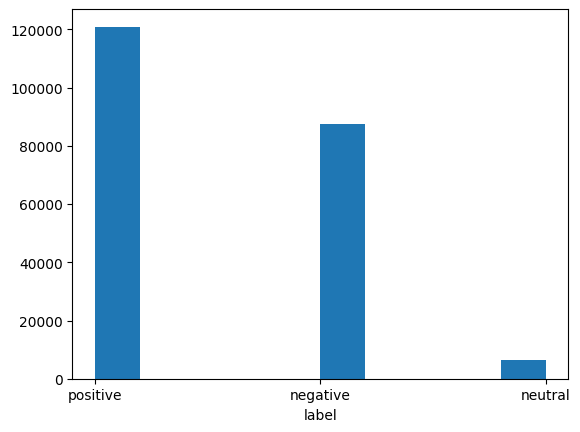

In [46]:
import matplotlib.pyplot as plt

x = df['label']
plt.hist(x)
plt.xlabel('label')
plt.show()

In [47]:
cols_to_drop = df[(df['census region'] == 'northeast') | (df['census region'] == 'midwest')].index
df.drop(cols_to_drop, inplace=True)

df['census region'].value_counts()

census region
southern    83476
west        51483
Name: count, dtype: int64

In [48]:
def census_review_counts(region):
    count1 = df[(df['census region'] == region) & (df['label'] == 'positive')]
    count2 = df[(df['census region'] == region) & (df['label'] == 'negative')]
    count3 = df[(df['census region'] == region) & (df['label'] == 'neutral')]
    print(count1['label'].value_counts())
    print(count2['label'].value_counts())
    print(count3['label'].value_counts())

In [49]:
census_review_counts('southern') # 47476 pos | 33369 neg | 2631 neutral | 83476 total
census_review_counts('west') # 31535 pos | 18391 neg | 1557 neutral | 54183 total

label
positive    47476
Name: count, dtype: int64
label
negative    33369
Name: count, dtype: int64
label
neutral    2631
Name: count, dtype: int64
label
positive    31535
Name: count, dtype: int64
label
negative    18391
Name: count, dtype: int64
label
neutral    1557
Name: count, dtype: int64


In [50]:
import scipy.stats as stats
alpha = 0.05

observed = np.array([
    [47476, 33369, 2631],
    [31535, 18391, 1557]
])

chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(observed)

if p_value < alpha:
    print("Significance Found")
    print(p_value)

Significance Found
2.4550254713598326e-56


In [51]:
three_way_contingency = pd.crosstab([df['census region'],df['label']],df['has owner answer'],margins=False)
three_way_contingency

has owner answer            0      1
census region label                 
southern      negative  17715  15654
              neutral    1135   1496
              positive  18032  29444
west          negative   8565   9826
              neutral     663    894
              positive  13761  17774

In [54]:
alpha = 0.05

chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(three_way_contingency)

if p_value < alpha:
    print("Significance Found")
    print(p_value)

Significance Found
0.0


In [55]:
'''
import demoji
import re

def remove_emoji(string):
    return demoji.replace(string, '')

def remove_extra_spaces(string):
    return re.sub(r'\s{2,}',' ',str(string))

df['cleaned text'] = df['Review Text'].apply(remove_emoji)
df['cleaned text'] = df['cleaned text'].apply(remove_extra_spaces)
'''

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\charlesrowe\AppData\Local\Temp\ipykernel_25896\2740514511.py:1: SyntaxWarning: invalid escape sequence '\s'
  '''


"\nimport demoji\nimport re\n\ndef remove_emoji(string):\n    return demoji.replace(string, '')\n\ndef remove_extra_spaces(string):\n    return re.sub(r'\\s{2,}',' ',str(string))\n\ndf['cleaned text'] = df['Review Text'].apply(remove_emoji)\ndf['cleaned text'] = df['cleaned text'].apply(remove_extra_spaces)\n"

In [56]:
'''
def isEnglish(c):
    try:
        c.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

non_english = []
for index, row in df.iterrows():
    for l in list(row['cleaned text']):
        for c in l:
            if isEnglish(c) == True:
                pass
            else:
                non_english.append(c)
print(non_english[:10])
'''

"\ndef isEnglish(c):\n    try:\n        c.encode(encoding='utf-8').decode('ascii')\n    except UnicodeDecodeError:\n        return False\n    else:\n        return True\n\nnon_english = []\nfor index, row in df.iterrows():\n    for l in list(row['cleaned text']):\n        for c in l:\n            if isEnglish(c) == True:\n                pass\n            else:\n                non_english.append(c)\nprint(non_english[:10])\n"